В файле пример того, как открыть файл mat и как он выглядит  
Если кратко:

1. Файлы .mat на питоне можно открыть при помощи библиотеки pymatreader (а именно фукнция read_mat). Далее этот файл можно спокойно перегнать в пандасовский dataframe  
2. Файл каждого человека содеражит информацию о нём (столбцы profile и demographics), данные ЭЭГ (EEG_clean) и айтрекинга (ET_clean) !(Почему то у некоторых людей в данных айтрекинга одни nan (например S01 и S42 (и это только те, которые я нашёл))). Плюс есть блок информации по продуктам, которые просматривали испытуемые  
3. Чтобы получить данные ээг и айтрекинга по конкретному продукту, нкжно соотнести данные 'EEG_segments' для этого продукта с данными всей ээг человека. Я пока не понял, как это нужно сделать (кроме как тупо сделать в матлабе так же, как они предлагают в документе)

In [114]:
import pandas as pd
import pymatreader as pmr
import numpy as np

In [115]:
file_name='S01'

data=pmr.read_mat(f'{file_name}.mat')

In [116]:
data.keys() #Как я понял, header, version, globals просто относятся к mat файлу, а не к данным в нём#

dict_keys(['__header__', '__version__', '__globals__', 'S01'])

In [117]:
df_not_clean=pd.DataFrame(data[file_name])
df_not_clean

,Page1,Page2,Page3,Page4,Page5,Page6,Profile,Demographics,EEG_clean,ET_clean
Product1,"{'ProductInfo': {'Bought': 0, 'Reasons': [], '...","{'ProductInfo': {'Bought': 0, 'Reasons': [], '...","{'ProductInfo': {'Bought': 1, 'Reasons': 'comb...","{'ProductInfo': {'Bought': 0, 'Reasons': [], '...","{'ProductInfo': {'Bought': 0, 'Reasons': [], '...","{'ProductInfo': {'Bought': 0, 'Reasons': [], '...",NaN,NaN,NaN,NaN
Product2,"{'ProductInfo': {'Bought': 0, 'Reasons': [], '...","{'ProductInfo': {'Bought': 0, 'Reasons': [], '...","{'ProductInfo': {'Bought': 0, 'Reasons': [], '...","{'ProductInfo': {'Bought': 0, 'Reasons': [], '...","{'ProductInfo': {'Bought': 0, 'Reasons': [], '...","{'ProductInfo': {'Bought': 0, 'Reasons': [], '...",NaN,NaN,NaN,NaN
Product3,"{'ProductInfo': {'Bought': 0, 'Reasons': [], '...","{'ProductInfo': {'Bought': 0, 'Reasons': [], '...","{'ProductInfo': {'Bought': 0, 'Reasons': [], '...","{'ProductInfo': {'Bought': 0, 'Reasons': [], '...","{'ProductInfo': {'Bought': 0, 'Reasons': [], '...","{'ProductInfo': {'Bought': 0, 'Reasons': [], '...",NaN,NaN,NaN,NaN
Product4,"{'ProductInfo': {'Bought': 1, 'Reasons': ['dis...","{'ProductInfo': {'Bought': 0, 'Reasons': [], '...","{'ProductInfo': {'Bought': 0, 'Reasons': [], '...","{'ProductInfo': {'Bought': 0, 'Reasons': [], '...","{'ProductInfo': {'Bought': 0, 'Reasons': [], '...","{'ProductInfo': {'Bought': 0, 'Reasons': [], '...",NaN,NaN,NaN,NaN
Product5,"{'ProductInfo': {'Bought': 0, 'Reasons': [], '...","{'ProductInfo': {'Bought': 0, 'Reasons': [], '...","{'ProductInfo': {'Bought': 0, 'Reasons': [], '...","{'ProductInfo': {'Bought': 0, 'Reasons': [], '...","{'ProductInfo': {'Bought': 0, 'Reasons': [], '...","{'ProductInfo': {'Bought': 0, 'Reasons': [], '...",NaN,NaN,NaN,NaN
Product6,"{'ProductInfo': {'Bought': 0, 'Reasons': [], '...","{'ProductInfo': {'Bought': 0, 'Reasons': [], '...","{'ProductInfo': {'Bought': 0, 'Reasons': [], '...","{'ProductInfo': {'Bought': 0, 'Reasons': [], '...","{'ProductInfo': {'Bought': 0, 'Reasons': [], '...","{'ProductInfo': {'Bought': 0, 'Reasons': [], '...",NaN,NaN,NaN,NaN
Product7,"{'ProductInfo': {'Bought': 0, 'Reasons': [], '...","{'ProductInfo': {'Bought': 0, 'Reasons': [], '...","{'ProductInfo': {'Bought': 0, 'Reasons': [], '...","{'ProductInfo': {'Bought': 0, 'Reasons': [], '...","{'ProductInfo': {'Bought': 0, 'Reasons': [], '...","{'ProductInfo': {'Bought': 0, 'Reasons': [], '...",NaN,NaN,NaN,NaN
Product8,"{'ProductInfo': {'Bought': 1, 'Reasons': 'comb...","{'ProductInfo': {'Bought': 0, 'Reasons': [], '...","{'ProductInfo': {'Bought': 0, 'Reasons': [], '...","{'ProductInfo': {'Bought': 0, 'Reasons': [], '...","{'ProductInfo': {'Bought': 0, 'Reasons': [], '...","{'ProductInfo': {'Bought': 0, 'Reasons': [], '...",NaN,NaN,NaN,NaN
Product9,"{'ProductInfo': {'Bought': 0, 'Reasons': [], '...","{'ProductInfo': {'Bought': 0, 'Reasons': [], '...","{'ProductInfo': {'Bought': 0, 'Reasons': [], '...","{'ProductInfo': {'Bought': 0, 'Reasons': [], '...","{'ProductInfo': {'Bought': 0, 'Reasons': [], '...","{'ProductInfo': {'Bought': 0, 'Reasons': [], '...",NaN,NaN,NaN,NaN
Product10,"{'ProductInfo': {'Bought': 0, 'Reasons': [], '...","{'ProductInfo': {'Bought': 1, 'Reasons': 'regu...","{'ProductInfo': {'Bought': 0, 'Reasons': [], '...","{'ProductInfo': {'Bought': 0, 'Reasons': [], '...","{'ProductInfo': {'Bought': 0, 'Reasons': [], '...","{'ProductInfo': {'Bought': 0, 'Reasons': [], '...",NaN,NaN,NaN,NaN


In [118]:
#Вытащим данные об испытуемом#
useless_products=np.arange(1, 25, 1)
s=[]
for i in useless_products:
    s.append('Product'+str(i))
useless_products=s

useless_pages=['Page1', 'Page2', 'Page3', 'Page4', 'Page5', 'Page6']

In [119]:
useless_demographic=['Age', 'Gender', 'DominantHand', 'Education', 'MaritalStatus', 'Children']

In [120]:
useless_profile=['WeeklySupermarketVisits', 'SupermarketVisitDuration', 'PriceImpact', 'BrandImpact', 'DiscountImpact', 'AdvertisementImpact', 'SuggestionImpact', 'ShoppingList', 'VerbalVisual', 'Spontaneous', 'VarietySeeker', 'UtilitarianMotivation', 'HedonicMotivation', 'Extraversion', 'Neuroticism', 'Agreeableness', 'Openness', 'Conscientiousness', 'BargainHunter']

In [121]:
df_subjective_data_about_human_aka_profile=df_not_clean.drop(useless_products+['Data', 'Fs', 'chans']+useless_demographic)
df_subjective_data_about_human_aka_profile.drop(columns=useless_pages+['Demographics', 'EEG_clean', 'ET_clean'], inplace=True)
df_subjective_data_about_human_aka_profile=df_subjective_data_about_human_aka_profile.transpose()
#ДОБАВИТЬ АЙДИ ЧЕЛА#
df_subjective_data_about_human_aka_profile

,WeeklySupermarketVisits,SupermarketVisitDuration,PriceImpact,BrandImpact,DiscountImpact,AdvertisementImpact,SuggestionImpact,ShoppingList,VerbalVisual,Spontaneous,VarietySeeker,UtilitarianMotivation,HedonicMotivation,Extraversion,Neuroticism,Agreeableness,Openness,Conscientiousness,BargainHunter
Profile,1-2 times,<15 minutes,7,6,7,6,7,yes,3.409091,2.333333,3.4,3.857143,2.285714,3.5,2.5,4,3.5,3,2.5


In [122]:
df_objective_data_about_human_aka_demographic=df_not_clean.drop(useless_products+useless_profile+['Data', 'Fs', 'chans'])
df_objective_data_about_human_aka_demographic.drop(columns=useless_pages+['Profile', 'EEG_clean', 'ET_clean'], inplace=True)
df_objective_data_about_human_aka_demographic=df_objective_data_about_human_aka_demographic.transpose()
#ДОБАВИТЬ АЙДИ ЧЕЛА#
df_objective_data_about_human_aka_demographic

,Age,Gender,DominantHand,Education,MaritalStatus,Children
Demographics,24,male,right,college,single,no


In [123]:
#Вытащим данные об ЭЭГ испытуемого#
eeg_useful_data=df_not_clean['EEG_clean']
eeg_useful_data=eeg_useful_data.drop(useless_demographic+useless_profile+useless_products)
eeg_useful_data=pd.DataFrame(eeg_useful_data).transpose()
#Добавить АЙДИ чела#
eeg_useful_data
#FS - частота дискретизации

,Data,Fs,chans
EEG_clean,"[[0.2587480947583478, 0.5803546823349861, 1.96...",300,"{'labels': ['P3', 'C3', 'F3', 'Fz', 'F4', 'C4'..."


In [124]:
#Вытащим данные айтрекинга испытуемого#
et_useful_data=df_not_clean['ET_clean']
et_useful_data=et_useful_data.drop(useless_demographic+useless_profile+useless_products)
et_useful_data=pd.DataFrame(et_useful_data).transpose()
#Добавить АЙДИ чела#
et_useful_data

,Data,Fs,chans
ET_clean,"[[nan, nan, nan, nan, nan, nan, nan, nan, nan,...",120,"[left_x, left_y, left_pupil, right_x, right_y,..."


In [125]:
#Пора разобраться с данными#
et_data=et_useful_data.Data['ET_clean']
print(et_data) #??????????????#

et_chans=et_useful_data.chans['ET_clean']
print(et_chans)

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
['left_x', 'left_y', 'left_pupil', 'right_x', 'right_y', 'right_pupil']


In [126]:
eeg_data=eeg_useful_data.Data['EEG_clean']
print(eeg_data)
print(len(eeg_data))
#ПРЕДПОЛАГАЮ, что каждый список соответствует электоду из labels в chans#

eeg_chans=eeg_useful_data.chans['EEG_clean']
print(eeg_chans)
print(list(eeg_chans.keys()))
print(eeg_chans['labels'])

[[  0.25874809   0.58035468   1.96903764 ... -10.40614911 -11.51071953
  -10.20236378]
 [  3.45728639   6.11417093   8.66400703 ...  -7.93155239  -7.57963554
   -4.65451184]
 [ 14.47658527  18.50365201  21.99474903 ...  -7.38573833  -5.77704172
   -3.67908715]
 ...
 [ 10.42275165   8.42921023   6.77438157 ...   8.89169333   9.49028759
   11.35907314]
 [ -0.68380683  -3.09883984  -3.50369204 ...  -7.70675379  -9.21193102
   -9.54429478]
 [  3.8794835    7.44637746  12.37870418 ...  -8.31234673  -5.93260107
   -2.24905561]]
19
{'labels': ['P3', 'C3', 'F3', 'Fz', 'F4', 'C4', 'P4', 'Cz', 'Pz', 'Fp1', 'Fp2', 'T3', 'T5', 'O1', 'O2', 'F7', 'F8', 'T6', 'T4'], 'type': [array([], dtype='<U1'), array([], dtype='<U1'), array([], dtype='<U1'), array([], dtype='<U1'), array([], dtype='<U1'), array([], dtype='<U1'), array([], dtype='<U1'), array([], dtype='<U1'), array([], dtype='<U1'), array([], dtype='<U1'), array([], dtype='<U1'), array([], dtype='<U1'), array([], dtype='<U1'), array([], dtype='<U

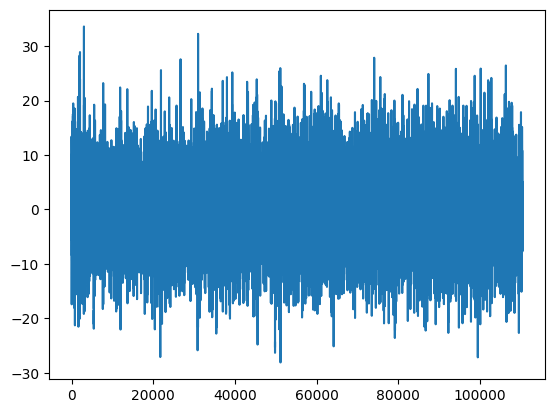

In [127]:
#вытащим ЭЭГ для F4 электрода#
f4_index=eeg_chans['labels'].index('F4')
eeg_f4=eeg_data[f4_index]
import matplotlib.pyplot as plt
plt.plot(np.arange(1, len(eeg_f4)+1, 1), eeg_f4)
#НУЖНО СООТНЕСТИ наблюдения конкретного продукта и соотвествующуюю ЭЭГ#

In [128]:
#Для этого надо разобраться с products
df_products=df_not_clean.drop(columns=['Profile', 'Demographics', 'EEG_clean', 'ET_clean'])
df_products.drop(useless_demographic+useless_profile+['Data', 'Fs', 'chans'], inplace=True)
df_products['Page3'][21]
#СУТЬ - для каждого человека нужно выделить ЭЭГ, остносящиеся к конкретному продукту по данным EEG_segments#

C:\Users\Егор\AppData\Local\Temp\ipykernel_10396\3452471849.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_products['Page3'][21]


{'ProductInfo': {'Bought': 1,
  'Reasons': 'alternative',
  'Familiarity': 2,
  'FrequentBuy': 0,
  'Description': 'Spagheti'},
 'EEG_segments': array([[73388, 73473],
        [73600, 73700],
        [73798, 73910],
        [74948, 75028],
        [75033, 75048],
        [75053, 75055],
        [75060, 75063],
        [75065, 75068],
        [75070, 75073],
        [75078, 75080],
        [75085, 75088],
        [75093, 75098],
        [75103, 75105],
        [75115, 75118],
        [75125, 75338],
        [75730, 75850],
        [76220, 76470],
        [99023, 99085],
        [99890, 99893],
        [99895, 99905],
        [99910, 99913],
        [99918, 99923],
        [99940, 99943],
        [99948, 99950]]),
 'ET_segments': array([[29357, 29391],
        [29442, 29482],
        [29521, 29566],
        [29981, 30013],
        [30015, 30021],
        [30023, 30024],
        [30026, 30027],
        [30028, 30029],
        [30030, 30031],
        [30033, 30034],
        [30036, 30037],

In [129]:
#Попробуем для конкретного продукта#
#ЧЕСТНО, я так и не понял, правильно это или нет#
pr=df_products['Page3'][21]
eeg_for_pr=pr['EEG_segments']
print(eeg_f4)
print(len(eeg_f4))
print(eeg_for_pr)
eeg_f4_for_pr=[]
for i in eeg_for_pr:
    k=[]
    for j in range(i[1]-i[0]):
       k.append(eeg_f4[i[0]+j])
    eeg_f4_for_pr.append(k)

[ 8.42646403  5.76192778  5.06147028 ... -1.45020753  1.18687431
  3.80713191]
110400
[[73388 73473]
 [73600 73700]
 [73798 73910]
 [74948 75028]
 [75033 75048]
 [75053 75055]
 [75060 75063]
 [75065 75068]
 [75070 75073]
 [75078 75080]
 [75085 75088]
 [75093 75098]
 [75103 75105]
 [75115 75118]
 [75125 75338]
 [75730 75850]
 [76220 76470]
 [99023 99085]
 [99890 99893]
 [99895 99905]
 [99910 99913]
 [99918 99923]
 [99940 99943]
 [99948 99950]]


C:\Users\Егор\AppData\Local\Temp\ipykernel_10396\3610518147.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pr=df_products['Page3'][21]


[[-0.020690051214715878, 0.20988209062706964, 0.3932362598862206, 1.6499541121115875, 3.4590265178369504, 5.974430462660772, 8.080272694199154, 6.043141212370125, 2.1169856330640027, -2.871081523744177, -7.529525473063944, -7.750621710812483, -6.275218687124858, -3.856281051640582, -1.1946507570347513, -0.8801538417574486, -0.9939445934594707, -1.6310880880560066, -2.2479004786333037, -0.4876387409836599, 1.7378932050464342, 5.10327628545954, 8.23095804348376, 6.803844191700331, 3.7931526885565368, -0.5201814097105533, -4.886917362006375, -5.200802702452313, -4.072620168516779, -1.3814874737408445, 1.485926769972486, 0.5193377192849897, -1.5854788084146605, -4.494402149221295, -7.140837770441773, -6.129386745210854, -4.006872762694434, -1.05615635384095, 1.9341113677286368, 1.8928133864731607, 0.9273710345136066, -0.23514007552742525, -1.361670261751919, -0.772370676116487, 0.5125519931132314, 1.3666246237823854, 2.376881662024889, 4.51652361787632, 6.907410928285061, 9.905426512824418

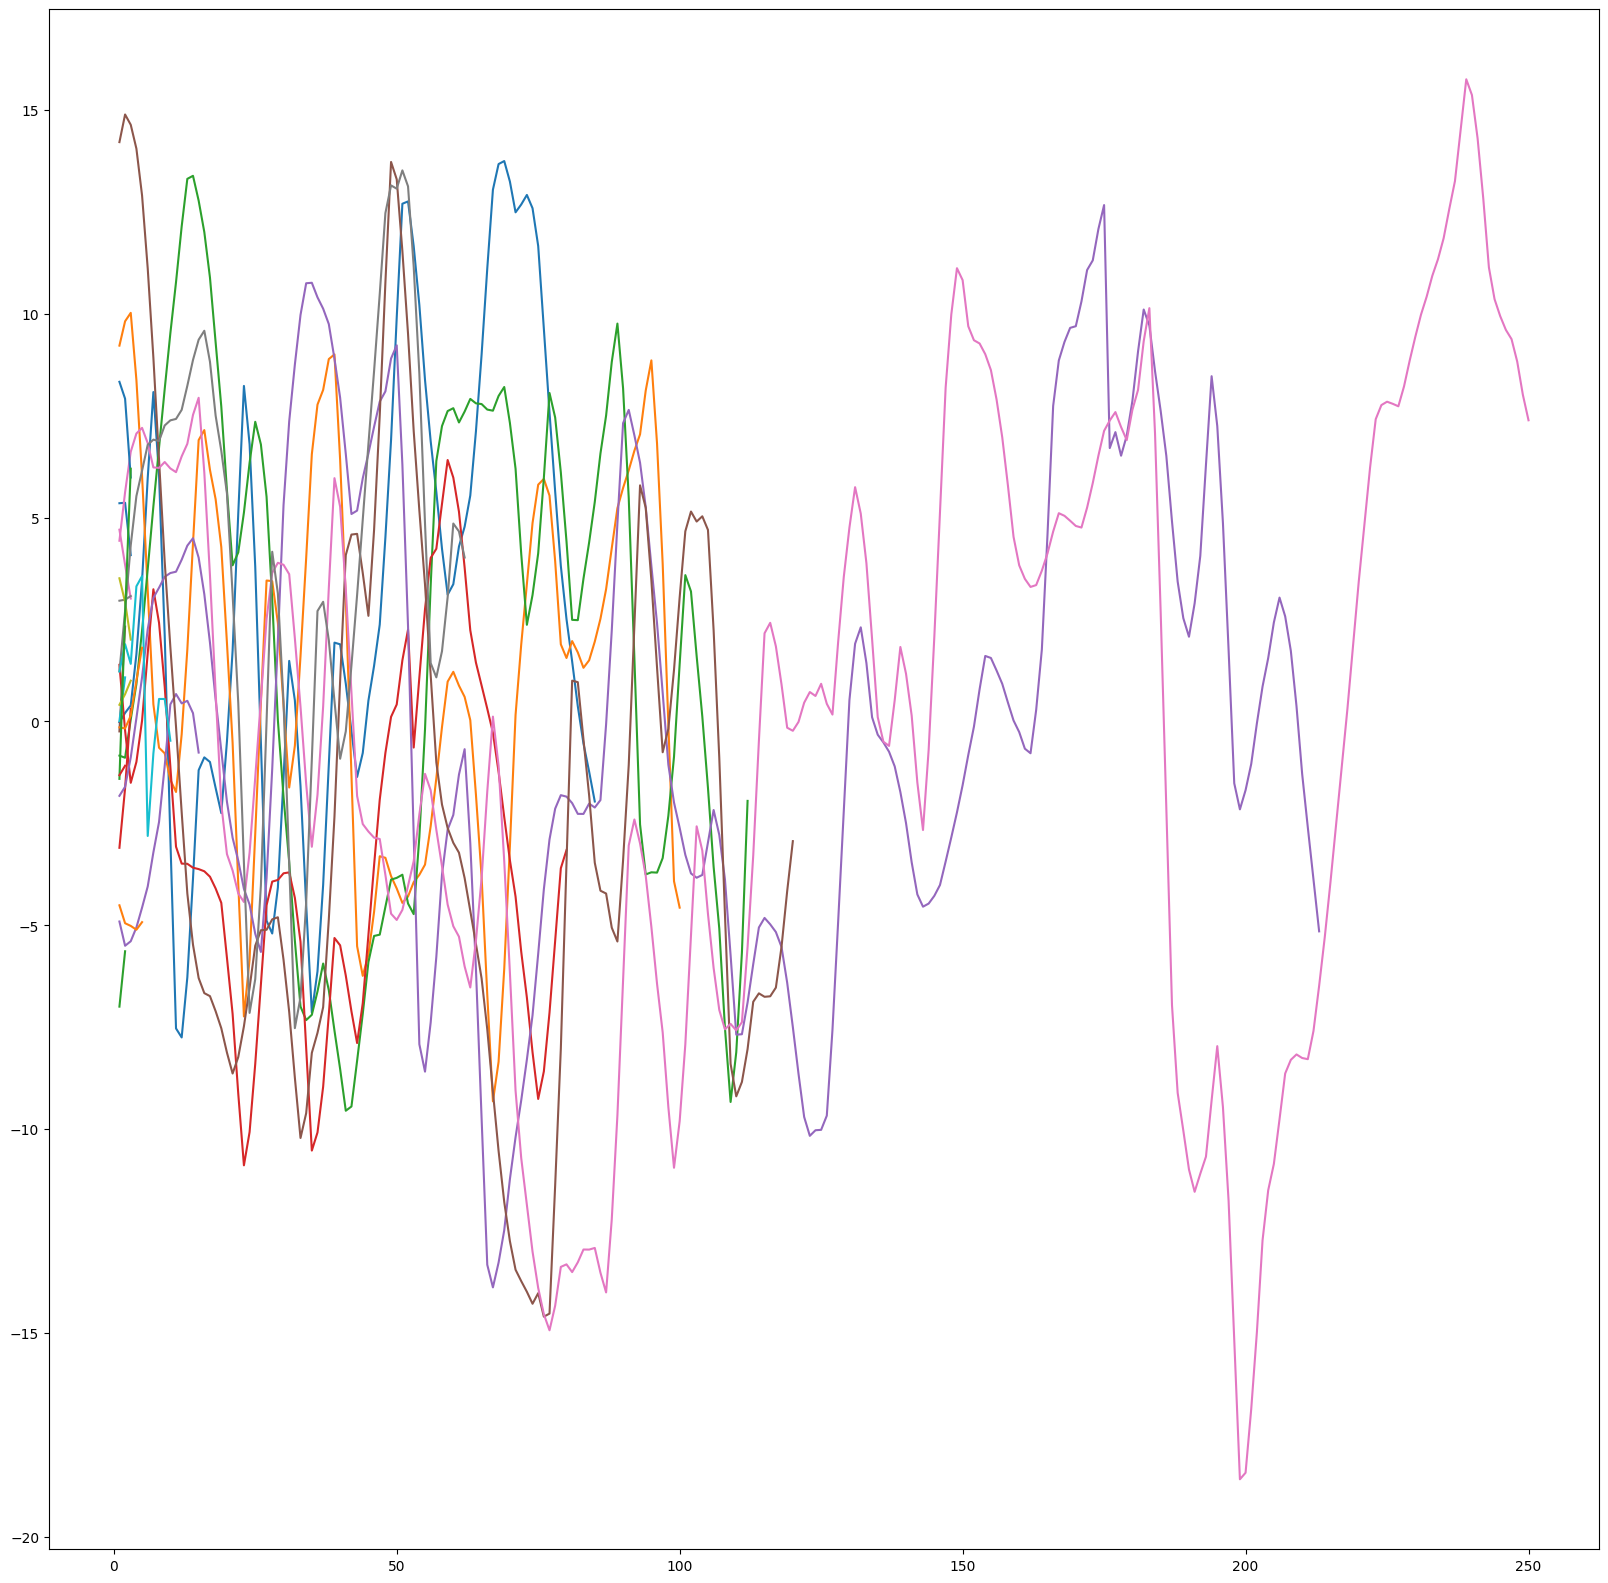

In [130]:
print(eeg_f4_for_pr)
fig, ax=plt.subplots(figsize=(20, 20))
for i in eeg_f4_for_pr:
    ax.plot(np.arange(1, len(i)+1, 1), i)
#КАК Я ПОНЯЛ, это будут данные ээг для конкретного продукта (разными цветами обозначены разные моменты, когда человек смотрел на продукт)

#НО ВПОЛНЕ ВЕРОЯТНО, что я НЕПРАВИЛЬНО эти данные извлек (соотнес с данными всей ээг)#
